In [11]:
# Here is a simple program that displays the camera feed in a cv2.namedWindow and will save images inside bounding box when 'c' is pressed on keyboard. 
# It will also quit if you hit ESC.

import cv2
import os
import time
from PIL import Image
from keras.models import load_model, model_from_json
from keras.preprocessing import image
import numpy as np

# dimensions of our images
image_x, image_y = 64, 64

cam = cv2.VideoCapture(1)
if cam.read()[0]==False:
    cam = cv2.VideoCapture(0)
#Prediction Classes
gesture_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','OK GOOGLE','P','Q','R','S','SPACE','T','U','V','W','X','Y','Z']

def get_bounding_box(img):
    x, y, w, h = 420, 140, 200, 200
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
    
def get_cropped_image(img):
    x, y, w, h = 420, 140, 200, 200
#     cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
    imgCrop = img[y:y+h, x:x+w]
    return imgCrop

def process_image(img):
    # clone the frame
    clone = img.copy()
    # convert to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # applying gaussian blur
    value = (35, 35)
    blurred = cv2.GaussianBlur(grey, value, 0)

    # thresholdin: Otsu's Binarization method
    _, thresh = cv2.threshold(blurred, 127, 255,
                               cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh
def load_new_model():
    # load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    return loaded_model

def get_prediction(img,loaded_model):
    loaded_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = loaded_model.predict_classes(images, batch_size=10)
    prediction = gesture_list[int(classes)]
    
    return prediction

def start_camera(loaded_model):
    frames=0
    sentence = ""
    while True:
        img = cam.read()[1]
        img = cv2.flip(img, 1)
        img_cropped = get_cropped_image(img)
        processed_img = process_image(img_cropped)
        # Convert to image with 3 Channels
        thresh = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2RGB)
        # make a PIL image
        to_predict = Image.fromarray(thresh)
        to_predict = to_predict.resize((64,64))
        contours = cv2.findContours(processed_img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
        contour = max(contours, key = cv2.contourArea)
        img_name= "gesture.jpg"
        if len(contours) > 0:
            if cv2.contourArea(contour) < 10000 and frames > 50:
                try:
#                     pred = get_prediction(to_predict,loaded_model)
#                     if pred =="SPACE":
#                         sentence = sentence + " "
#                     elif pred =="OK GOOGLE":
#                         pass
#                     else:
#                         sentence = sentence + pred
#                     cv2.putText(img, pred, (30, 60), cv2.FONT_HERSHEY_TRIPLEX, 2, (127, 255, 255))
#                     cv2.putText(img, sentence, (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 0.7, (127, 127, 255))
                    cv2.imwrite(img_name, thresh)
                except Exception as e:
                    pred = "--"
                    print("Something Happened :",e)
                    break
        else:
            print("Cannot Recognize Hand Moments-Too much disturbance! Get a Plain Background with Hand Gestures on Front")
        get_bounding_box(img)
        cv2.putText(processed_img, str(cv2.contourArea(contour)), (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 0.7, (127, 127, 255))
        cv2.imshow("Capturing gesture", img)
        cv2.imshow("thresh", processed_img)
        keypress = cv2.waitKey(1)
        if not keypress==-1:
            print("Key number: ",keypress)
        if keypress%256 == 27:
            # 'ESC' pressed
            print("Escape hit, closing...")
            break
        frames +=1

loaded_model = load_new_model()
try:
    start_camera(loaded_model)
except Exception as e:
    print("Something Happened :",e)
cam.release()
cv2.destroyAllWindows()

Loaded model from disk
Key number:  27
Escape hit, closing...


In [18]:


def process_image(img):
    # clone the frame
    clone = img.copy()
    # convert to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # applying gaussian blur
    value = (35, 35)
    blurred = cv2.GaussianBlur(grey, value, 0)

    # thresholdin: Otsu's Binarization method
    _, thresh = cv2.threshold(blurred, 127, 255,
                               cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh

In [54]:
#Basic CV2 function to read camera input
import cv2
from PIL import Image
cam = cv2.VideoCapture(1)
load_new_model()
if cam.read()[0]==False:
    cam = cv2.VideoCapture(0)
while True:
    img = cam.read()[1]
    img = cv2.flip(img, 1)
    img_cropped = get_cropped_image(img)
    thresh = process_image(img_cropped)
    # Convert to image with 3 Channels
    thresh2 = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
    img2 = Image.fromarray(thresh2, 'RGB')
    get_bounding_box(img)
    cv2.imshow("Capturing gesture", img)
    cv2.imshow("Cropped", img_cropped)
    cv2.imshow("Threshold",thresh)
    keypress = cv2.waitKey(1)
    if not keypress==-1:
        print("Key number: ",keypress)
    if keypress%256 == 27:
        # 'ESC' pressed
        print("Escape hit, closing...")
        break
cam.release()
cv2.destroyAllWindows()

Loaded model from disk
Key number:  27
Escape hit, closing...


In [25]:
cam.release()
cv2.destroyAllWindows()

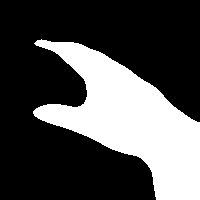

In [55]:
img2

In [56]:
img2 = img2.resize((64,64))

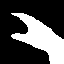

In [57]:
img2

In [61]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [65]:
start = time.time()
loaded_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = loaded_model.predict_classes(images, batch_size=10)
prediction = gesture_list[int(classes)]
end = time.time()
print("Time to predict",str(end-start))

Time to predict 2.7235381603240967


In [63]:
prediction

'C'

In [53]:
loaded_model.predict(images)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)